# Лабораторная 1




Работать будем с функцией $f(x) = x^4+x^2+x+1$. Для начала построим ее график:

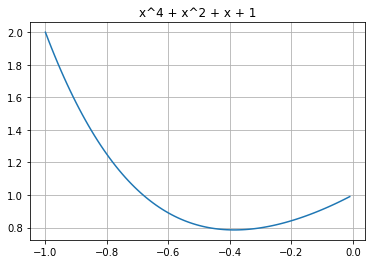

In [2]:
import numpy as np
from numpy import power as pow
import matplotlib.pyplot as plt
from random import uniform as uni

def myfunc(x):
    return pow(x, 4) + pow(x, 2) + x + 1


def myfunc_prime(x):
    return 4 * pow(x, 3) + 2 * x + 1


def myfunc_second(x):
    return 12 * pow(x, 2) + 2

def plot(x, y, label_x="", label_y="", title=""):
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show()

a = -1
b = 0
e = 0.001

x = np.arange(a, b, e)
y = myfunc(x)

plot(x, y, title = "x^4 + x^2 + x + 1")

### Задание 1,2

**Метод перебора**

In [29]:
def brute(fun, a, b, e):
    x = np.arange(a, b, e)
    return x[np.argmin(fun(x))], x.size

print("x_opt = %f\ni = %d" % brute(myfunc, a, b, e))

%timeit brute(myfunc, a, b, e)

x_opt = -0.385000
i = 1000
77.9 µs ± 3.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод порязрядного поиска**

In [31]:
n = 4

def bitwise_search(fun, a, b, e, n, n_):
    d = (b - a) / n
    x0 = a
    i = 0
    for _ in range(0, n_):
        f0 = fun(x0)
        x1 = x0 + d
        f1 = fun(x1)
        if f0 > f1:
            x0 += d
            if (x0 > b):
                raise Exception("Most likely your function is not unimodal")
        else:
            a = x1 - 2 * d
            b = x1
            d /= n
            x0 = a
        i += 1
        if np.abs(f0 - f1) < e:
            break
    x_opt = (a + b) / 2
    return x_opt, i

print("x_opt = %f\ni = %d" % bitwise_search(myfunc, -1, 0, 0.001, 4, 20))

%timeit bitwise_search(myfunc, -1, 0, 0.001, 4, 20)

x_opt = -0.375000
i = 13
90.8 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Модель дихотомии**

In [34]:
def bisection(fun_prime, a, b, e):
    i = 0
    c = (a + b) / 2
    while (b - a) / 2 > e:
        if fun_prime(c) == 0:
            i += 1
            return c, i
        elif fun_prime(a) * fun_prime(c) < 0:
            i += 1
            b = c
        else:
            a = c
        c = (a + b) / 2
    return c, i


print("x_opt = %f\ni = %d" % bisection(myfunc_prime, a, b, 0.001))

%timeit bisection(myfunc_prime, a, b, 0.001)

x_opt = -0.385742
i = 4
54.3 µs ± 3.58 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод золотого сечения**

In [33]:
def gss(fun, a, b, e=0.001):
    i = 0
    gr = (np.sqrt(5) + 1) / 2  # equals 1.618....
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > e:
        if fun(c) < fun(d):
            i += 1
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
    return (b + a) / 2, i

print("x_opt = %f\ni = %d" % gss(myfunc, a, b, e=0.001))

%timeit gss(myfunc, a, b, e=0.001)

x_opt = -0.385438
i = 6
93.8 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод парабол**

In [15]:
def parabolic_select_helper(fun, a, b, n):
    for _ in range(0, n):
        x = sorted([uni(a, b) for _ in range(0, 3)])
        if fun(x[0]) >= fun(x[1]) <= fun(x[2]):
            return x
    raise Exception("Most likely your function is not unimodal")


def parabolic_interp(fun, a, b, e, n):
    x0, x1, x2 = parabolic_select_helper(fun, a, b, 100)
    i = 0
    f0 = fun(x0)
    f1 = fun(x1)
    f2 = fun(x2)

    for _ in range(0, n):
        a1 = (f1 - f0) / (x1 - x0)
        a2 = (1 / (x2 - x1)) * (((f2 - f0) / (x2 - x0)) - ((f1 - f0) / (x1 - x0)))
        if i == 0:
            X = 0.5 * (x0 + x1 - a1 / a2)
        else:
            X2 = 0.5 * (x0 + x1 - a1 / a2)
            if np.abs(X2 - X) < e:
                i += 1
                return X2, i
            else:
                X = X2
        f_min = fun(X)
        i += 1
        if X < x2:
            x2 = x1
            f2 = f1
            x1 = X
            f1 = f_min
        else:
            x0 = x1
            f0 = f1
            x1 = X
            f1 = f_min
            
print("x_opt = %f\ni = %d" % parabolic_interp(myfunc, a, b, e, 20))

%timeit parabolic_interp(myfunc, a, b, e, 20)

x_opt = -0.384724
i = 7
57.8 µs ± 709 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод средней точки**

In [16]:
def middle_point(fun_prime, a, b, e, n):
    i = 0
    for _ in range(0, n):
        i += 1
        x = (a + b) / 2
        f_p = fun_prime(x)
        if np.abs(f_p) < e:
            return x, i
        else:
            if f_p > 0:
                b = x
            else:
                a = x

print("x_opt = %f\ni = %d" % parabolic_interp(myfunc, a, b, e, 20))

%timeit parabolic_interp(myfunc, a, b, e, 20)

x_opt = -0.385548
i = 6
60.1 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод хорд**

In [21]:
def chords(fun_prime, a, b, e, n):
    i = 0
    for _ in range(0, n):
        i += 1
        X = a - (fun_prime(a) / (fun_prime(a) - fun_prime(b))) * (a - b)
        f_p = fun_prime(X)
        if np.abs(f_p) < e:
            return X, i
        else:
            if f_p > 0:
                b = X
            else:
                a = X

print("x_opt = %f\ni = %d" % chords(myfunc_prime, a, b, e, 100))

%timeit chords(myfunc_prime, a, b, e, 100)

x_opt = -0.385203
i = 12
145 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


**Метод Ньтона**

In [25]:
def newton(fun_prime, fun_second, x0, e, n):
    x = x0
    i = 0
    for _ in range(0, n):
        df = fun_prime(x)
        ddf = fun_second(x)
        i += 1
        if np.abs(df) < e
            i += 1
            return x, i
        else:
            x = x - df / ddf
        if np.abs(x) < e:
            return None
        
print("x_opt = %f\ni = %d" % newton(myfunc_prime, myfunc_second, -0.4, e, 100))

%timeit newton(myfunc_prime, myfunc_second, -0.4, e, 100)

x_opt = -0.385714
i = 3
11.4 µs ± 129 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Задание 3